In [9]:

import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import os
import numpy as np


In [10]:
def extract_values_from_file(file_path):
    # Initialize a list to store all detected outputs
    all_detected_outputs = []

    # Open the file for reading
    with open(file_path, 'r') as file:
        # Loop through each line in the file
        for line in file:
            # Check if the line contains the pattern "(interaction weight)"
            if "Score" not in line:
                if "Path" in line:
                    if ":" in line:
                        # Find the position of "Path" in the line
                        index = line.find(":")

                        # Extract the substring starting from the position of "Path" to the end of the line
                        extracted_string = line[index+len(": "):].strip()

                        # Split the extracted string by "->" to get individual values
                        values = extracted_string.split("->")

                        # Initialize a list to store extracted values
                        extracted_values = []

                        # Loop through each value
                        for value in values:
                            # Extract and append the trimmed value to the extracted values list
                            extracted_values.append(value.strip())

                        # Append the extracted values list to the list of all detected outputs
                        all_detected_outputs.append(extracted_values)

    # Return all the detected outputs
    return all_detected_outputs

In [11]:
# Example usage:
file_path = "C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/Graph-Construction-shortest-path/acyclic_shortest_paths.txt"
detected_outputs = extract_values_from_file(file_path)
print("Detected outputs:")
# print(detected_outputs)
for output in detected_outputs:
    print(output)

Detected outputs:
['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1']
['Q9NQ76', 'P62993', 'P62241', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13535', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13315', 'Q8N5P1']
['Q9NQ76', 'P12931', 'Q13435', 'Q8N5P1']
['Q9NQ76', 'P06241', 'Q9H7E9', 'Q8N5P1']


In [12]:
def create_graph_from_pathways(pathways):
    # Create a directed graph
    
    G = nx.DiGraph()

    # Add nodes and edges from pathways
    for pathway in pathways:
        for i in range(len(pathway) - 1):
            source_node = pathway[i]
            target_node = pathway[i + 1]
            G.add_edge(source_node, target_node)

    return G


def plot_graph(G):
    # Plot the graph
        # Retrieve the first node by finding nodes with no predecessors
    first_node = [node for node in G.nodes if not list(G.predecessors(node))][0]

    # Retrieve the last node by finding nodes with no successors
    last_node = [node for node in G.nodes if not list(G.successors(node))][0]

    
    node_colors = ["orange" if node in first_node  else "green" if node in last_node else "skyblue" for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color=node_colors, font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Pathway Graph")
    plt.show()

[('Q9NQ76', 'O14757'), ('Q9NQ76', 'P62993'), ('Q9NQ76', 'P00519'), ('Q9NQ76', 'P12931'), ('Q9NQ76', 'P06241'), ('O14757', 'Q8IVT5'), ('Q8IVT5', 'Q8N5P1'), ('P62993', 'P62241'), ('P62241', 'Q8N5P1'), ('P00519', 'Q13535'), ('P00519', 'Q13315'), ('Q13535', 'Q8N5P1'), ('Q13315', 'Q8N5P1'), ('P12931', 'Q13435'), ('Q13435', 'Q8N5P1'), ('P06241', 'Q9H7E9'), ('Q9H7E9', 'Q8N5P1')]


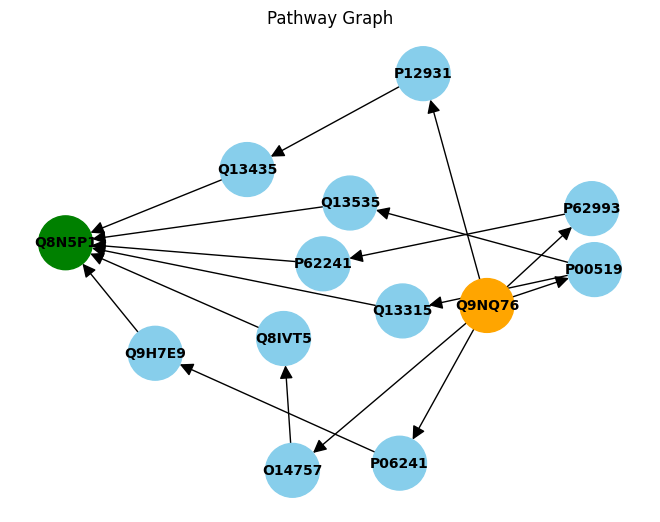

In [13]:
graph = create_graph_from_pathways(detected_outputs)
print(graph.edges())
plot_graph(graph)

In [14]:
def transform_and_remove_repeated(pathways):
    # Flatten the 2D array to 1D array
    flattened_pathways = [protein for pathway in pathways for protein in pathway]

    # Check for repetition and remove repeated elements
    unique_elements = []
    repeated_elements = set()
    for protein in flattened_pathways:
        if protein not in unique_elements:
            unique_elements.append(protein)

    return unique_elements

unique_elements = transform_and_remove_repeated(detected_outputs)
print("Unique elements after removing repetitions:", unique_elements)

Unique elements after removing repetitions: ['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1', 'P62993', 'P62241', 'P00519', 'Q13535', 'Q13315', 'P12931', 'Q13435', 'P06241', 'Q9H7E9']
